Roboflow

In [4]:
from roboflow import Roboflow
import os

#Aşağıdaki kodları Roboflow veriyor.
rf = Roboflow(api_key="XqHDKsuIAorOnYpZyPA1")
project = rf.workspace("erol-cbx6f").project("football-boxes-qb22i")
version = project.version(2)
dataset = version.download("yolov8") #Bu kod roboflowdaki verisetini bilgisayarımıza indirecek.
                

#YOLOv8'in eğitimi için ihtiyaç duyduğu yapılandırma(ayar) dosyasının tam yolunu oluşturuyoruz.
veriseti_bilgi = os.path.join(dataset.location, "data.yaml")

#Böylece veriseti ve ayar dosyamız projenin çalıştığı yere inecektir.

loading Roboflow workspace...
loading Roboflow project...


In [5]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt') 

results = model.train(
    data=veriseti_bilgi,  #Önceki hücrede aldığımız data.yaml yolu
    epochs=10, 
    imgsz=640,            
    batch=16,             
    name='futbol sahası' #eğittiğimiz modelin kaydedileceği klasör adı
)

# Eğitilen modelin (best.pt) yolunu bir değişkene atıyoruz.
#runs/detect/futbolsahası/weights/best.pt yoluna gidince görebiliyoruz.
egitilmis_model = os.path.join("runs", "detect", "futbol sahası", "weights", "best.pt")

Ultralytics 8.3.220  Python-3.13.7 torch-2.9.0+cpu CPU (Intel Core i7-14650HX)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=c:\Users\reybe\Desktop\staj\football-boxes-2\data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=futbol sahas2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspe


image 1/1 C:\Users\reybe\Desktop\staj\YOLOv8 foto\4.jpg: 384x640 1 18Yard Circle, 3 First Half Fields, 3 Second Half Fields, 28.7ms
Speed: 1.1ms preprocess, 28.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to C:\Users\reybe\Desktop\staj\runs\detect\predict


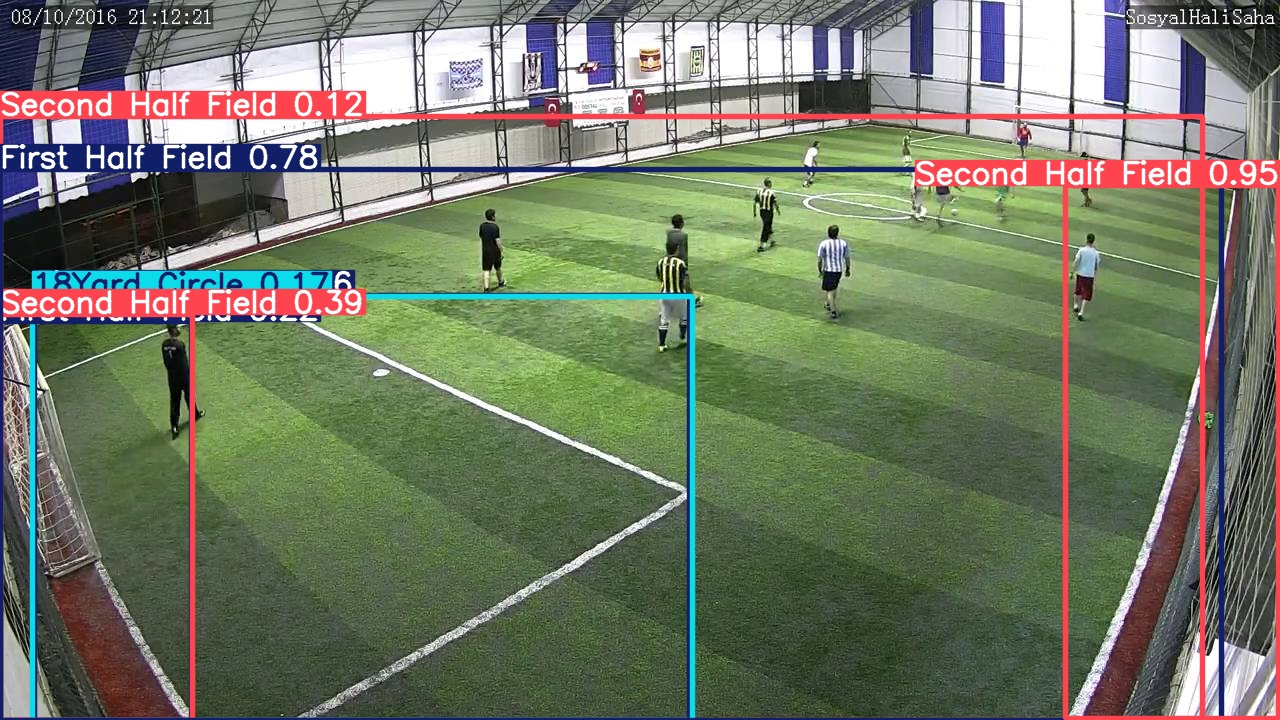

In [16]:
from IPython.display import Image, display #Jupyter'de resim göstermek için 'Image' ve 'display' fonksiyonlarını içe aktardık.
from pathlib import Path #dosya ve klasörleri yönetebildiğimiz kütüphane.

Test_resim= "C:/Users/reybe/Desktop/staj/YOLOv8 foto/4.jpg"

trained_model = YOLO(egitilmis_model) #Kendi eğittiğimiz modeli YOLO'ya ekliyoruz.

predict_results = trained_model.predict(
    source=Test_resim,
    save=True,  #Sonuçları kaydetmek için.    
    conf= 0.1,   #Emin olma oranı %10 altındaki tespitleri dikkate alma dedik.
    project="runs/detect",  #Sonuçların kaydedileceği ana klasör.
    name="predict",         #Sonuçların kaydedileceği alt klasör adı (hep 'predict' olacak).
    exist_ok=True           #Eğer "runs/detect/predict" klasörü varsa, üzerine yaz.
)

#Kaydetme klasörünün yolu (artık hep sabit: 'runs/detect/predict')
predict_yolu = Path(predict_results[0].save_dir)

#Orijinal resmin sadece dosya adını al (pathlib yöntemiyle). Yani sadece "4.jpg"yi alacaktır.
test_dosya_adi = Path(Test_resim).name

#Yolları birleştiriyoruz. ( / operatörü ile)
saved_image_path = predict_yolu / test_dosya_adi


display(Image(filename=saved_image_path)) #Tespit yapılmış sonuç resmini Jupyter Notebook hücresinin altında göster dedik.